In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

*** Since i download dataset now i will import it ***

In [4]:
df = pd.read_csv('loan_dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [19]:
df.shape

(346, 10)

# Data Visulisation

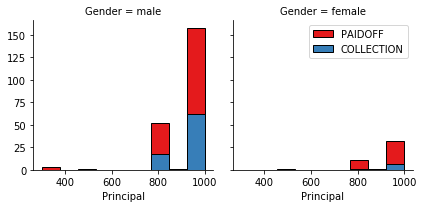

In [14]:
import seaborn as sbn

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

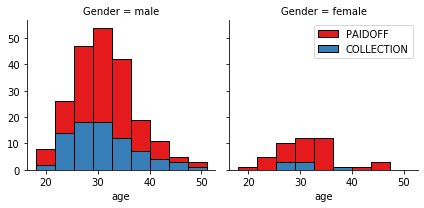

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# DATA PREPROCESSING

**convert Date Time object**

In [22]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [26]:
#we will add new feature dayofweek and weekend(is or not)
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>=4)  else 0)

**We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4**


In [27]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


**Convert Categorical features to numerical values**

In [28]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**Convert Male to 0 and Femal to 1**

In [29]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


**Create feature from few data**

In [30]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


**Final feature x and label y**

In [34]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [36]:
x = preprocessing.StandardScaler().fit(Feature).transform(Feature)
x[:5]
# Normalising

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [46]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## Classification Model

# 1. KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

limit = 12
mean_acc = np.zeros((limit-1))
std_acc = np.zeros((limit-1))

for i in range (1,limit):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68571429, 0.67142857, 0.77142857, 0.68571429, 0.78571429,
       0.7       , 0.8       , 0.75714286, 0.74285714, 0.64285714,
       0.7       ])

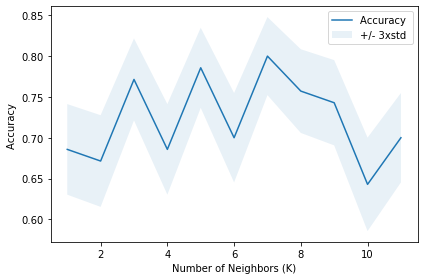

The best accuracy was with 0.8 with k= 7


In [48]:
plt.plot(range(1,limit),mean_acc)
plt.fill_between(range(1,limit),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

knn = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(x_train, y_train)

# 2. DECISION TREE

In [53]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(x_train, y_train)

#Prediction
predTree = modeltree.predict(x_test)
print(predTree[0:5])
print(y_test[0:5])

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


# 3 SUPPORT VECTOR MECHANISM

In [56]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)
print(yhat[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'PAIDOFF']


# $ Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(x_train,y_train)

yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

print(yhat_prob[0:5])
print(yhat[0:5])
print(y_test[0:5])

[[0.44956104 0.55043896]
 [0.30336965 0.69663035]
 [0.27491874 0.72508126]
 [0.51775693 0.48224307]
 [0.33247473 0.66752527]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']




# MODEL EVALUATION

**first we Load test dataset and Preprocess them**

In [61]:
Test = pd.read_csv('loan_test.csv')
Test.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [65]:
Test['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [66]:
Test.shape

(54, 10)

In [68]:
Test['due_date'] = pd.to_datetime(Test['due_date'])
Test['effective_date'] = pd.to_datetime(Test['effective_date'])

Test['dayofweek'] = Test['effective_date'].dt.dayofweek
Test['weekend'] = Test['dayofweek'].apply(lambda x: 1 if (x>=4)  else 0)

In [71]:
Test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Test_feature = Test[['Principal','terms','age','Gender','weekend']]
Test_feature = pd.concat([Test_feature,pd.get_dummies(Test['education'])], axis=1)
Test_feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [76]:
#Normlising
X = preprocessing.StandardScaler().fit(Test_feature).transform(Test_feature)
Y = Test['loan_status'].values

In [77]:
X[:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [78]:
Y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [82]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

knn_pred=knn.predict(X)
jc1=jaccard_score(Y, knn_pred, pos_label = "PAIDOFF")
fs1=f1_score(Y, knn_pred, average='weighted')

tree_pred=modeltree.predict(X)
jc2=jaccard_score(Y, tree_pred, pos_label = "PAIDOFF")
fs2=f1_score(Y, tree_pred, average='weighted')

svm_pred=clf.predict(X)
jc3=jaccard_score(Y, svm_pred, pos_label = "PAIDOFF")
fs3=f1_score(Y, svm_pred, average='weighted')

log_pred=LR.predict(X)
proba=LR.predict_proba(X)
jc4=jaccard_score(Y, log_pred, pos_label = "PAIDOFF")
fs4=f1_score(Y, log_pred, average='weighted')  
ll4=log_loss(Y, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

In [83]:
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.634615,0.620252,NA
Decision Tree,0.653061,0.681299,NA
SVM,0.703704,0.611916,NA
Logistic Regression,0.703704,0.611916,0.574568
